### Sree Kavya Durbaka 

### E22033

# What is time series data? 

A simple understanding is that , 

A series of data points collected over a course of time period, and are **Time-Indexed** is known as time series data. 

eg: Stock MaRKET, ECG signal, Weather Data etc., 

# Why visualize time series data? 

Visualization plays a vital role in analysing data. 

Plots of the raw sample data can provide valuable diagnostics to identify temporal structures like trends, cycles, seasonality that influence the choice of the model. 

# What are the various plots to visualize time series data?

1. Line Plot 
2. Lag Plot
3. Seasonality Plot 
4. Density plots 
5. Autocorrelation plots 
6. Seasonal Decomposition charts

In [11]:
import pandas as pd

In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/SreeKavyadurbaka/Time-Series-Forecasting-/main/Electric_Production.csv",index_col=0,parse_dates=True)

In [17]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## 1. Line Plot 

A line chart is used to represent the relationship between two columns X and Y on a different axis 

<AxesSubplot:xlabel='DATE', ylabel='Electricity Production'>

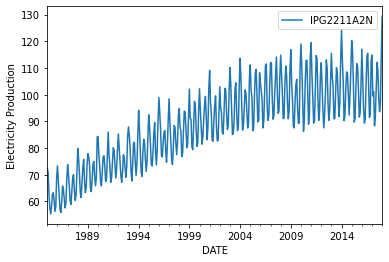

In [19]:
data.plot(ylabel="Electricity Production") #A pandas method 

This plot shows the variation in electricity production across years as shown in xlabel. 
This helps us get a bird's eye view of how the electricity production is changing over the years. 
It helps us get an idea about important questions in time series like, 

1. Is there a level? 

2. Is there a trend? 

3. Is there seasonality? 

The above data has a trend. About seasonality, it seems to exist but we have to look at how the production is changing within an year. After that, some hypothesis tests will help us confirm if these exist in the data. 

## 2. Lag plot 

A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis. 

The difference between these time units is called lag or lagged. 

#### Uses of a Lag plot:

1. **Distribution of the model:** A lag plot helps us understand the uderlying relationship between Ys an Y-k s. 

    If the lag plot is linear, then the underlying structure is of the Autoregressive Model. 

2. **Outliers** can be seen 

3. **Randomness** in the data: If there is no pattern in the lag plot, then it points to randomness. 

4. **Seasonality**: If there is seasonality, it will give a periodic lag plot. 

5. **Autocorrelation**: If the lag plot gives a linear plot, it means autocorrelation is present in the data. Poitive or negative depends on the slope of the line. If mode data is concentrated on the diagonal in lag plot, it means there is strong autocorrelation. 

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

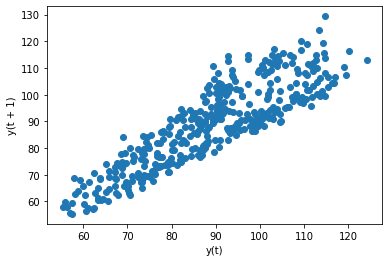

In [38]:
pd.plotting.lag_plot(data,lag=1) #Plotting against one lag 
plt.show()

Here, the relationship between y(t) and y(t+1) is shown 

## 3. Seasonlaity Plot 

A seasonal plot is similar to a time plot except the data is plotted against individual seasons in which data is observed. 

In [39]:
import seaborn as sns

In [43]:
def seasonal_plot(df, season='year', index='month', column=None):
    """Makes a seasonal plot of one column of the input dataframe. Considers the first columns by default.
    
    Arguments:
    
    - df (Pandas DataFrame): DataFrame indexed by Datetime (see `parse_dates` parameter when reading a CSV);
    - season (string): the season that you want to considering when doing the plot, e.g., year, month, etc.;
    - index (string): corresponds to the X axis of the plot. You should choose based on the index period that you're using;
    - column (string, optional): the DataFrame column to consider. Picks the first one by default.
    """
    if column == None:
        column = df.columns[0]
        
    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)
    
    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,8))

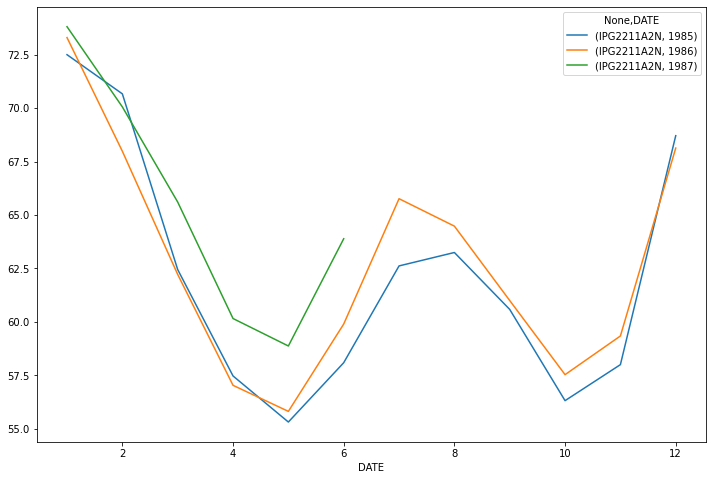

In [51]:
seasonal_plot(data[0:30],season = "year",index = "month")

In the above plots we see that in an year the "U" pattern is repeating. So we can say that there is seasonality. However, it should be backed by statistical tests. We can't confirm with visualisations. Visualisations always give a hint to how the data is.  
The data is cyclical also as the pattern seems to repeat itself over years also 

The above function is taken from https://gist.github.com/arthurcgusmao/39905499340d28fa59834f652905dcec#:~:text=Seasonal%20Plot%20in%20Python%20using%20Pandas%20and%20Seaborn,as%20sns%20def%20seasonal_plot%20%28df%2C%20season%3D%27year%27%2C%20index%3D%27month%27%2C%20column%3DNone%29%3A"

## 4. Density plots 

Some times series forecasting methods assume a well-behaved distribution of observations like a bell curve or normal distribution. This can be checked explicitly using statistical tests. However, a density plot points out to it. 

In [53]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<AxesSubplot:ylabel='Density'>

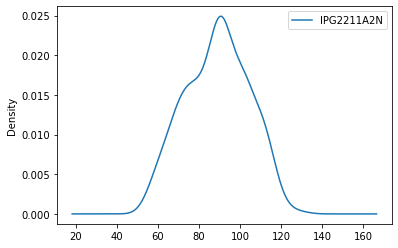

In [52]:
data.plot(kind = "kde") #Plotted the electricity production distribution against the frequency 

## 5. Autocorrelation plots 

We can look at the correlation between a value at a time against lag values in time series. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

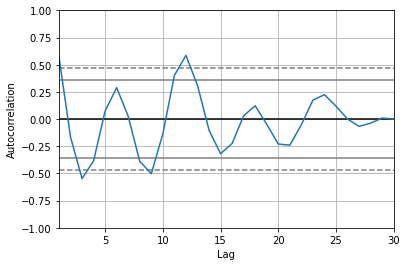

In [58]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data[0:30])

The above plot shows lag on the x-axis and autocorrelation on the y-axis.

With this we can understand the positive or negative correlation at some lag. Helps us understand the seasonal pattern.
If a clear sine wave is there, it means, there is a strong seasonality in the data.

## 6. Seasonal Decomposition Plot 

A time series is broken down into its respective components. 
1. Level 
2. Trend 
3. Seasonality 
4. Noise 

This will give us a clear idea of the components of the time series. 
There are two main types of decomposition models:


1. Additive 
2. Multiplicative 

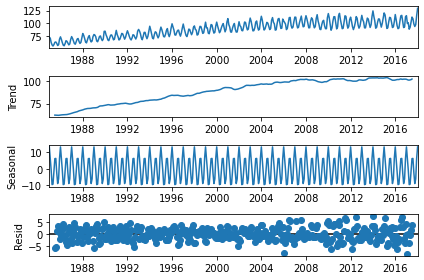

In [73]:
# Plotting using additive model 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model = "additive") 
#Changes in the data seem to be constant so going with additive model 
decomposition.plot()
plt.show()